# Modeling the drive

According to the definition of the input variables, they "**are not influenced by the behavior of the system**". With this definiton in mind, the input variables were interpreted to be the **c_losses** constant alone. Because both the current and the omega affect each other in solving the differential equations, whereas the constant can be tweaked to adjust the three output variables. 

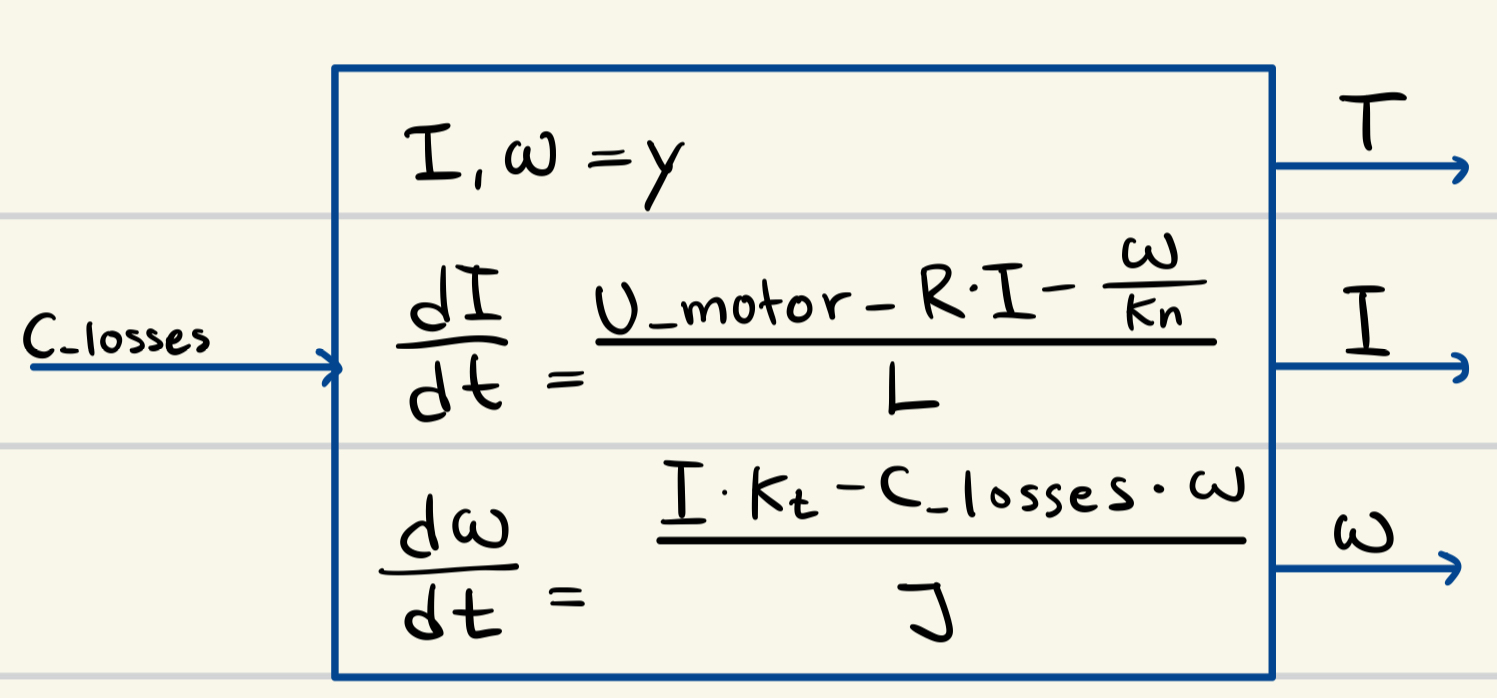

Relevant packages were imported.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

Then the relevant constants were computed and listed from the data sheet. A comment here is that to compute the speed constant, Kn, it was said to computed by dividing the rated voltage of the motor by the no load speed. According to the data sheet the rated voltage was **40 V**. We made the assumption that in our case, since we are using a 16 V motor, the rated voltage is **16 V**. We also introduced a dampening coefficient which is named "**c_losses**" here. This coefficient is multiplied by the omega to get the mechanical torque of the motor. Here, the coefficient is **0.0005**. The reason this specific value was chosen was to get a rotational speed of around **80%** of the no load speed.

In [2]:
U_motor = 16 #V
R = 151e-3 #ohm
L = 121e-6 #H
n0 = 12916 #rpm, No load speed
n0_rad = n0 * (2 * np.pi / 60) #rad/s, No Load angular speed
J = 0.056e-4 #kg*m^2, Rotor inertia
kn = n0_rad / U_motor #Speed constant
gear_ratio = 60
efficiency = 0.85
kt = 30e-3  # Torque constant [Nm/A]
c_losses = 0.0005 

The next step was to define the differential equations. The state variables were the current, **I**, and the angualar velocity, **omega**.
The initail states were also defined here, where both the initial current and angular velocity were set to zero. The simulation time was 0.05 seconds because more time was not needed for the model to stabalize.

In [3]:

def motor_dynamics(t, y):
    I, omega = y  # State variables: current (I) and angular velocity (omega)
    # Differential equations
    dI_dt = (U_motor - R * I - omega / kn) / L
    domega_dt = (I * kt - c_losses * omega) / J

    return [dI_dt, domega_dt]

y0 = [0, 0]
t_s = 0
t_e = 0.05
t_eval = np.linspace(t_s, t_e, 1000)

Next, the ODE's were solved and the results were given appropriate names. The angular velocity and the torque for the output were also introduced, which depend on the gear ratio and the efficiency of the gear box. 

In [4]:
sol = solve_ivp(motor_dynamics, (t_s,t_e), y0, t_eval = t_eval, method='RK45')

# Extract results
t = sol.t # Time [s]
I = sol.y[0] # Current [A]
Torque = kt * I  # Torque [Nm]
Torque_out = Torque * gear_ratio * efficiency #Torque [Nm]
omega_motor = sol.y[1]  # Motor angular velocity [rad/s]
omega_output = (omega_motor * efficiency) / gear_ratio   # Output angular velocity [rad/s]

Then the angular velocities were converted to angular speed and plotted together with the current and the torque, which was computed by multiplying the current with the torqe constant "**kt**".  

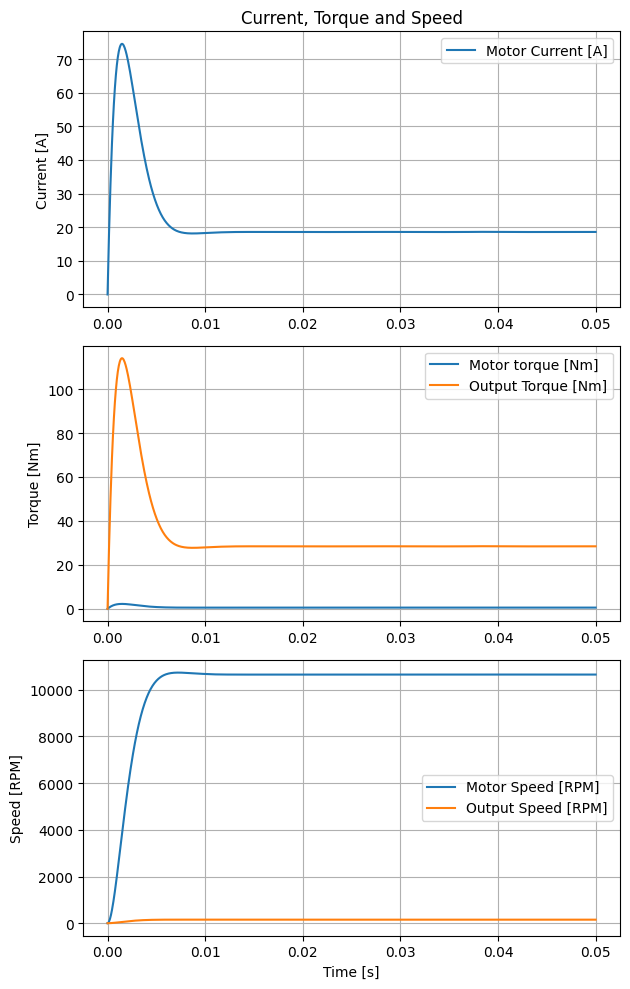

In [5]:
rpm_motor = omega_motor * 60 / (2 * np.pi)
rpm_output = omega_output * 60 / (2 * np.pi)

plt.figure().set_figheight(10)
plt.subplot(3, 1, 1)
plt.plot(t, I, label='Motor Current [A]')
plt.ylabel('Current [A]')
plt.title('Current, Torque and Speed')
plt.grid()
plt.legend()

plt.subplot(3, 1, 2)
plt.plot(t, Torque, label='Motor torque [Nm]')
plt.plot(t, Torque_out, label='Output Torque [Nm]')
plt.ylabel('Torque [Nm]')
plt.grid()
plt.legend()

# Speed plot
plt.subplot(3, 1, 3)
plt.plot(t, rpm_motor, label='Motor Speed [RPM]')
plt.plot(t, rpm_output, label='Output Speed [RPM]')
plt.xlabel('Time [s]')
plt.ylabel('Speed [RPM]')
plt.grid()
plt.legend()

plt.tight_layout()
plt.show()


